In [1]:
"""Задание 1
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

a) Необходимо найти наиболее похожего пользователя по косинусной метрике 
для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, 
до, скажем, 5-ти признаков, как вы это сделаете?
"""

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.optimize import minimize
%matplotlib inline

raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])


# формируем матрицу косинусного сходства строк 
list_ = pairwise_distances(raitings, metric='cosine')

# перебираем циклом с функцией enumerate() строки списка в формате номер строки (вложенный список)-ее значение:
for id, rows in enumerate(list_):
    # генератор списка выводит номер позиции i минимально близкого (самого близкого) вектора к очередному rows:
    # для этого очередной вектор (вложенный список) перебираем с функцией enumerate(), 
    # чтобы "достать" из него порядковый номер, наложив условие - это порядковый номер минималного значения вектора 
    # анонимная функция тип чисел float преобразует к int: 
    position_rows = [i for i, number in enumerate(rows) if number == np.min(rows[np.nonzero(rows)])]
    print(id, position_rows)
    
# Более короткая реализация: 
# for i, rows in enumerate(pairwise_distances(raitings, metric="cosine")):
#     print(i, list(rows).index(np.min(rows[np.nonzero(rows)])))

0 [8]
1 [4]
2 [9]
3 [9]
4 [8]
5 [9]
6 [3]
7 [5]
8 [0]
9 [2]


In [2]:
# выполним второй пункт задания 

from sklearn.decomposition import PCA

pca = PCA(n_components = 5)                          # Параметр n_components указывает на количество измерений, на которые будет 
                                                     # производиться проекция, 
                                                     # то есть до скольки измерений мы хотим снизить наш датасет. 
                                                     # Другими словами – это n собственных векторов с самыми большими 
                                                     # собственными числами
pca = PCA(n_components = 5)
XPCAreduced = pca.fit_transform(raitings)
XPCAreduced



array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

In [3]:
"""Задание 2
Вычислите производную tg^2(sin(x) + cos(2x+3)) в точке x=1 (на python и на бумаге).
"""
from scipy.misc import derivative 
import math
import sympy

np.power
def f(x):
    return (np.power((np.tan)((np.sin(x))+np.cos(2*x+3)), 2))  # возведение в степень реализуем через функцию np.power()

print('Производная на Питоне: ', derivative(f, 1.0, dx=1e-6))


x=sympy.symbols('x')
rt = (((sympy.tan)((sympy.sin(x))+sympy.cos(2*x+3)))**2)
diff_ = sympy.diff(rt, x)
print('Неоцененная производная: ', diff_.doit())

x=1
hand = 2*(-2*np.sin(2*x + 3) + np.cos(x))*(np.tan(np.sin(x) + np.cos(2*x + 3))**2 + 1)*np.tan(np.sin(x) + np.cos(2*x + 3))
print('Проверяем расчеты: ', hand)

Производная на Питоне:  55.3859176464222
Неоцененная производная:  2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))
Проверяем расчеты:  55.385917635337854


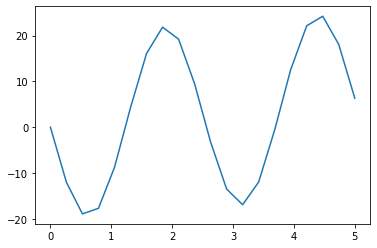

In [4]:
"""Задание 3
Дана функция с неизвестными параметрами a и b, 
вам также известны значения функции fx в точках x. 
Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.
"""
from scipy.optimize import differential_evolution

def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

plt.plot(x, fx)
plt.show()

def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [25]:
min_ = minimize(error, [0,0], method='COBYLA', options = {'xtol': 1e-8 , 'disp': True})
min_ # значения x в представленном в выводе результате задают значения параметров а и b  

C:\Users\zlatt\anaconda3\lib\site-packages\ipykernel_launcher.py:2: OptimizeWarning: Unknown solver options: xtol
  


     fun: 0.07674566111565184
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 135
  status: 1
 success: True
       x: array([ 3.00018796, -2.50008926])

выборка:  [18  6  8  6  6 16  6 30 10 19  6 19 27  6 14 27 33 14 19 17 10  6 17 17
 16 10 27 19 18 17  8 14  7  6 14 33  6 27 20 10  7 30  8 16  6  7 33 17
  8 16] 
Средняя величина выборки:  20.92


Text(0.5, 0, 'x')

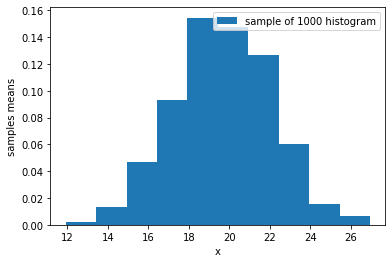

In [60]:
"""Задание 4
Создайте собственную дискретную случайную величину с 20 значениями. 
Сгенерируйте 1000 выборок размера 50. 
Посчитайте среднее для каждой выборки. 
Постройте гистограмму распределения средних
"""

import random
import scipy.stats as sts

random_variable = np.random.randint(5, 35, size = 20)

a = np.array([])
for i in range(1000):
    sample = np.random.randint(5, 35, size = 20) 
    random_int = np.random.choice(sample, 50)
    a= np.append(a, random_int.mean())

print('выборка: ', random_int, '\nСредняя величина выборки: ', sample_mean)

label_1 = 'sample of ' + str(1000) + ' histogram'
plt.hist(a, density=True, label=label_1)

plt.legend()
plt.ylabel('samples means')
plt.xlabel('x')

In [58]:
"""Задание 5
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)
"""
from numpy import linalg as LA

m = np.array([[1, 4],
              [1, 1]])
print(m)

w,v = LA.eig(m)
print(w)                # Собственные числа входной матрицы
print(v)                # Собственные векторы входной матрицы



[[1 4]
 [1 1]]
[ 3. -1.]
[[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]
